In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn
from scipy import stats

In [6]:
from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.metrics import classification_report, confusion_matrix

In [5]:
from sklearn import preprocessing, metrics

In [4]:
exams_path = "/home/sebastian/Descargas/tesis/all.csv"

In [7]:
eeg_dataset = pd.read_csv(exams_path, error_bad_lines=False)
X = eeg_dataset.iloc[:,0:5].values
y = eeg_dataset.iloc[:,5].values

In [23]:
eeg_dataset.head()

,delta,tetha,alpha,beta,gamma,class
0,0.190776,0.058923,0.129363,0.029849,0.012989,1
1,0.182318,0.095967,0.110752,0.049693,0.046891,1
2,0.183269,0.079512,0.116541,0.048885,0.049781,1
3,0.351450,0.066773,0.072149,0.030012,0.021886,1
4,0.242536,0.101548,0.174173,0.047890,0.026310,1


In [8]:
scaler = preprocessing.KBinsDiscretizer()

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
X_train.shape

(588, 25)

In [12]:
classifier = LogisticRegression(random_state=0, C=10, solver='lbfgs', penalty='l2').fit(X_train,y_train)
predicted_values = classifier.predict(X_test)
classifier.score(X_test,y_test)

0.6785714285714286

In [14]:
confusion_matrix = confusion_matrix(y_test, predicted_values)
confusion_matrix

array([[78, 53],
       [28, 93]])

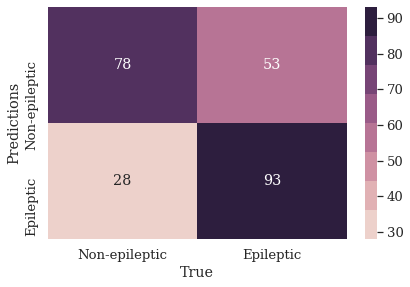

In [21]:
sb.set(rc={'figure.figsize':(6.7,4.27)},style='whitegrid',font_scale=1.2,palette=sb.cubehelix_palette(8))
sb.set_style({'font.family':'serif', 'font.serif':'Times New Roman'})
columns = ['Non-epileptic','Epileptic']
df_cm = pd.DataFrame(confusion_matrix, index=columns, columns=columns)

grafica = sb.heatmap(df_cm,cmap=sb.cubehelix_palette(8),annot=True,fmt='g')
plt.ylabel('True positives')
plt.xlabel('Predictions')
grafica.set(xlabel='True',ylabel='Predictions')
plt.show()

In [25]:
own_mets = (y_test, predicted_values)
acc = metrics.accuracy_score(*own_mets)
recall = metrics.recall_score(*own_mets)
f1_score = metrics.f1_score(*own_mets)
precision = metrics.precision_score(*own_mets)

In [26]:
print(f"Accuracy: {acc} \nRecall: {recall} \nF1 Score: {f1_score} \nPrecision: {precision}")

Accuracy: 0.6785714285714286 
Recall: 0.768595041322314 
F1 Score: 0.6966292134831461 
Precision: 0.636986301369863
